In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from random import random

In [2]:
np.array(1)

array(1)

In [3]:
import os

In [4]:
from lcmcmc.utils import get_data_dir_path

# Load data

In [5]:
new_object_df = pd.read_csv(os.path.join(get_data_dir_path(), "perfect_sims.csv"))

The perfect simulations are simulated for LSST so they have 6 differnet bands. Since right now we run the tests on the ZTF data which has only the g and r bands, we will use only these 2 from LSST for compution

# RUN MCMC

In [6]:
from lcmcmc.model import jd_model
import jax.numpy as jnp
import jax
import tensorflow_probability.substrates.jax as tfp

2023-06-15 11:30:58.210034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
rng = jax.random.PRNGKey(0)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [8]:
new_object_df=new_object_df[new_object_df["object_index"]<10]

In [9]:
index = np.zeros((len(new_object_df), 2), dtype=np.int32)

index[:, 0] = np.asarray(new_object_df["object_index"].values)
index[:, 1] = np.asarray(new_object_df["band_index"].values)

x_range = jnp.asarray(new_object_df["time"])

observed_value = np.array(new_object_df["flux"].values, dtype=jnp.float32)
observed_sigma = np.array(new_object_df["fluxerr"].values, dtype=jnp.float32)

jd = jd_model(index, x_range)

In [10]:
observed_value

array([ 6.0030574e-01,  1.0000000e+00,  9.2747563e-01,  6.4993823e-01,
        4.9483082e-01,  8.3475989e-01,  1.0000000e+00,  9.2640072e-01,
        6.5129972e-01,  4.2187762e-01, -1.0782436e-03,  1.0000000e+00,
        4.5535991e-01,  7.6711893e-02,  1.1780660e-02,  2.8657159e-01,
        1.0000000e+00,  4.5835465e-01,  1.2311858e-01,  3.1219121e-02,
        6.6990930e-01,  1.0000000e+00,  7.3861068e-01,  5.8819699e-01,
        3.0223170e-01,  8.9852947e-01,  1.0000000e+00,  7.4681741e-01,
        5.2176929e-01,  2.6526377e-01,  6.5639222e-01,  1.0000000e+00,
        7.6096272e-01,  3.3956999e-01,  1.2874678e-01,  7.1616739e-01,
        1.0000000e+00,  7.9726410e-01,  4.4095248e-01,  2.1318632e-01,
        3.6788112e-01,  1.0000000e+00,  7.4855119e-01,  5.1250619e-01,
        3.5150394e-01,  8.4325296e-01,  1.0000000e+00,  9.1519803e-01,
        7.7749151e-01,  6.7380553e-01, -3.5929354e-03,  1.0000000e+00,
        8.1655490e-01,  4.9918142e-01,  3.2124880e-01,  8.6752862e-01,
      

In [11]:
observed_sigma

array([0.01349051, 0.01464619, 0.01444336, 0.01363934, 0.01316864,
       0.00598875, 0.00634117, 0.00618668, 0.00557141, 0.00500074,
       0.00206392, 0.00433714, 0.00329935, 0.00231862, 0.00210504,
       0.00181808, 0.00294716, 0.00214498, 0.0014397 , 0.0011746 ,
       0.11736385, 0.11849878, 0.11760096, 0.1170812 , 0.11608661,
       0.01967344, 0.01997583, 0.01921246, 0.0185075 , 0.01766974,
       0.01663555, 0.01765853, 0.01695341, 0.01563311, 0.0149288 ,
       0.00852584, 0.00924289, 0.00873672, 0.0077676 , 0.00707892,
       0.00355724, 0.00487322, 0.00439717, 0.00389773, 0.00351661,
       0.00631809, 0.00665955, 0.00647705, 0.00616922, 0.00592689,
       0.00514722, 0.00792355, 0.00749171, 0.00667896, 0.0061767 ,
       0.0085089 , 0.00883118, 0.00848688, 0.00813839, 0.00778879,
       0.00451225, 0.00506266, 0.0048794 , 0.00439715, 0.0039222 ,
       0.00299955, 0.00314331, 0.00304762, 0.00282762, 0.00255798,
       0.00981865, 0.00981934, 0.00965993, 0.0095279 , 0.00929

In [12]:
# Run the mcmc
run_mcmc = lambda seed: tfp.experimental.mcmc.windowed_adaptive_nuts(
        100, 
        jd, 
        n_chains=4, 
        #num_adaptation_steps=5, 
        seed=seed,
        sigma=observed_sigma, 
        obs=observed_value,
    )


rng, sample_rng = jax.random.split(rng, 2)
mcmc_samples, sampler_stats = run_mcmc(sample_rng)

In [13]:
from lcmcmc.parametric_fits import parametric_fn
import matplotlib.pyplot as plt

(array([1200., 1107., 1851., 1892.,  715.,  427.,    8.,    0.,    0.,
         800.]),
 array([ 0.22285119,  1.44847977,  2.67410851,  3.89973712,  5.12536573,
         6.35099411,  7.57662296,  8.80225182, 10.02787971, 11.25350857,
        12.47913742]),
 <BarContainer object of 10 artists>)

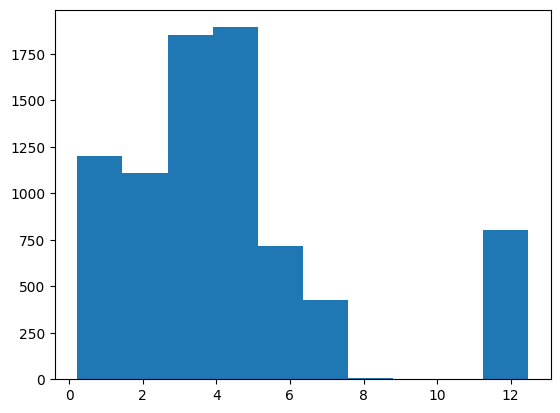

In [14]:
plt.hist(mcmc_samples.t_rise.flatten())

(array([ 673., 1231.,  732.,  335.,  335.,  285.,  421., 1177.,  965.,
        1846.]),
 array([ 0.97244412,  2.12518358,  3.27792335,  4.43066263,  5.58340216,
         6.73614216,  7.88888168,  9.04162121, 10.19436073, 11.34710026,
        12.49983978]),
 <BarContainer object of 10 artists>)

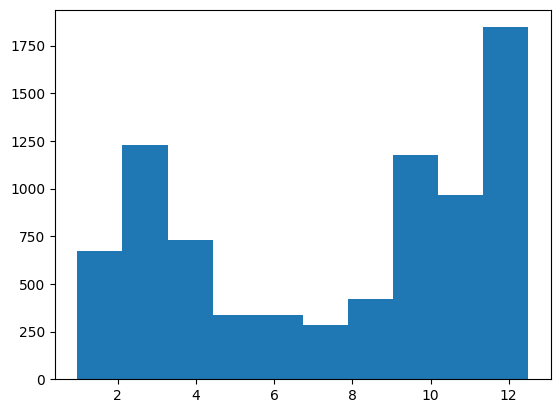

In [15]:
plt.hist(mcmc_samples.t_fall_.flatten())

In [16]:
len(mcmc_samples.t_fall_.flatten())

8000

0


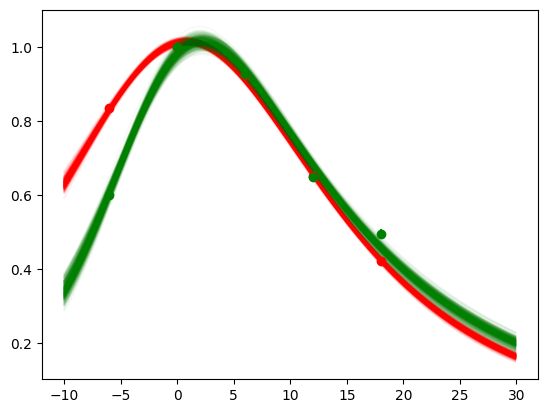

1


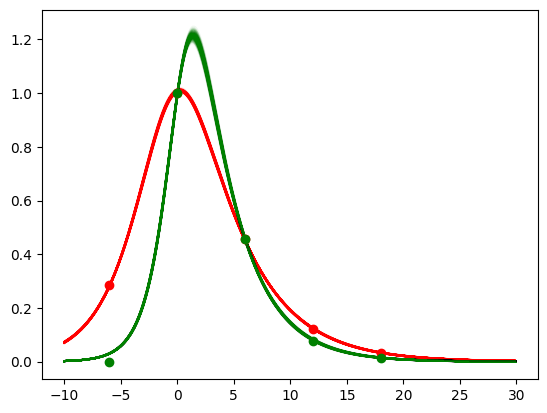

2


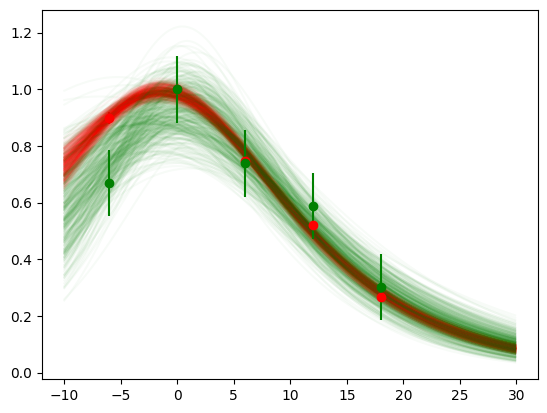

3


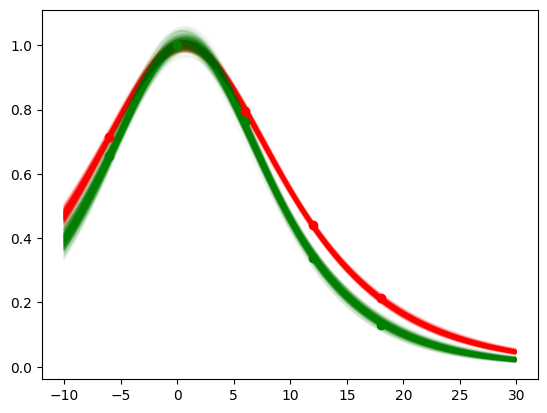

4


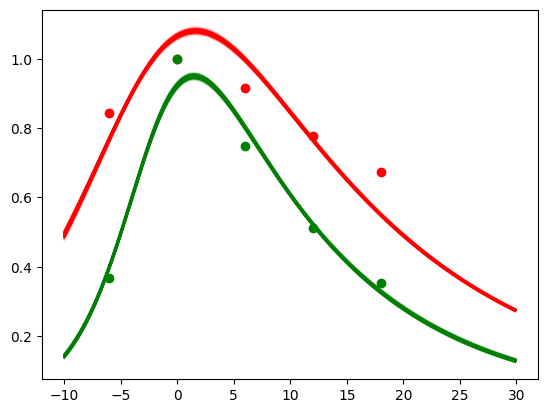

5


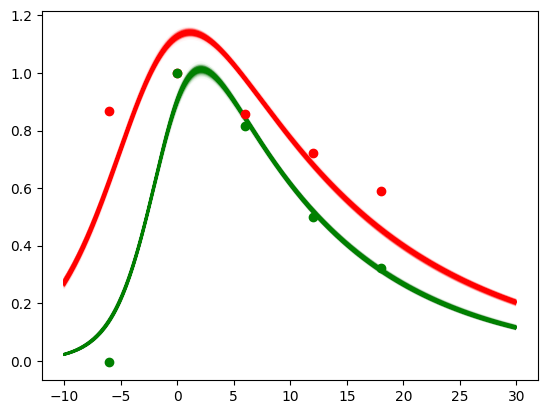

6


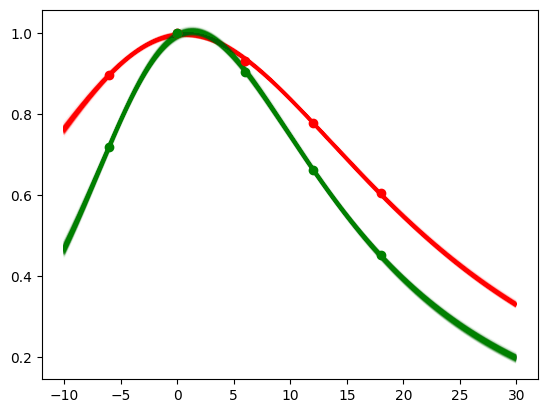

7


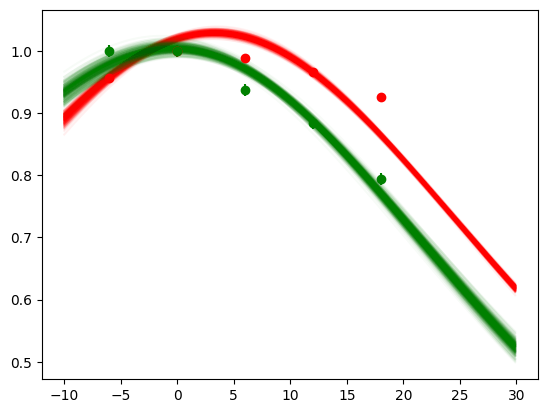

8


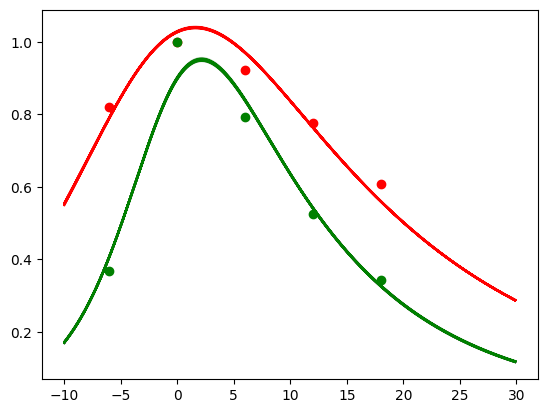

9


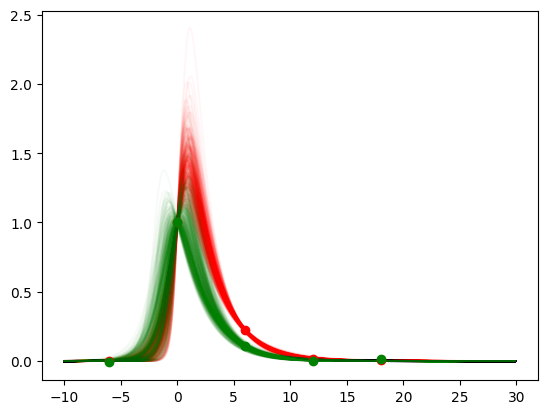

10


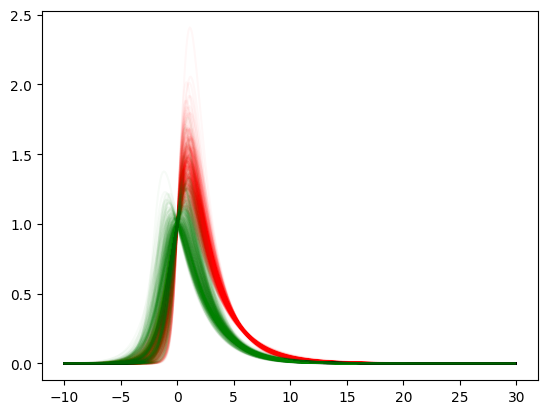

11


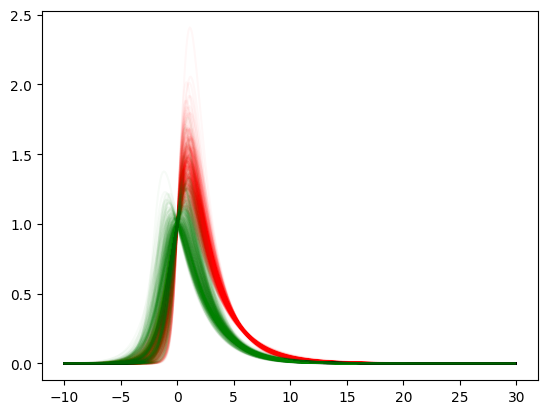

12


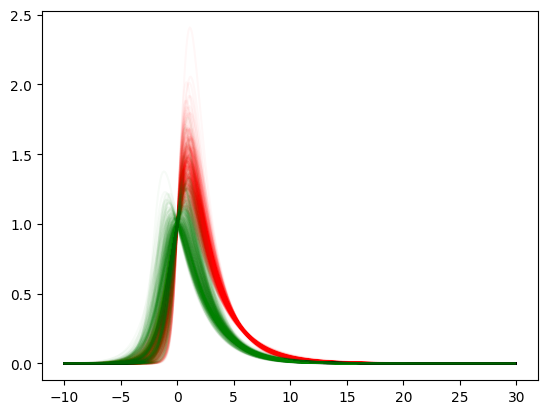

13


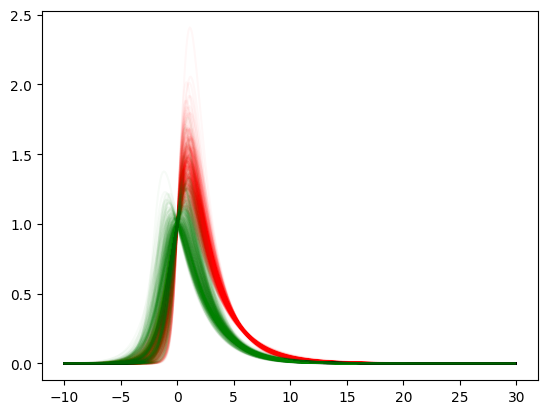

14


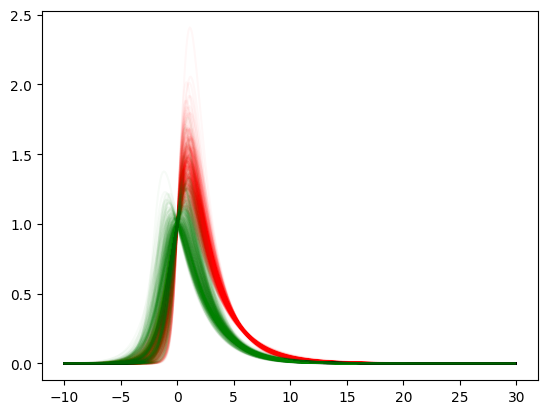

15


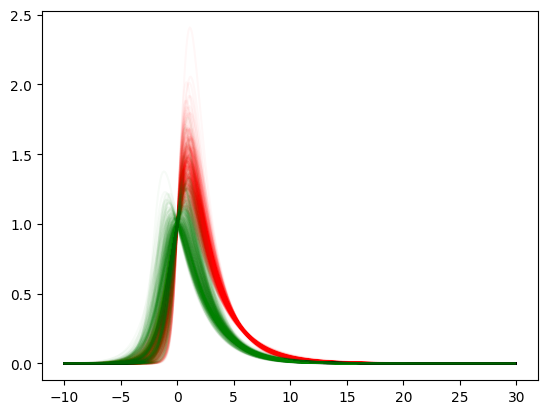

16


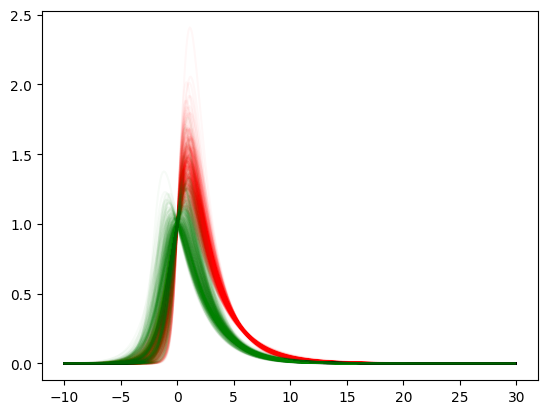

17


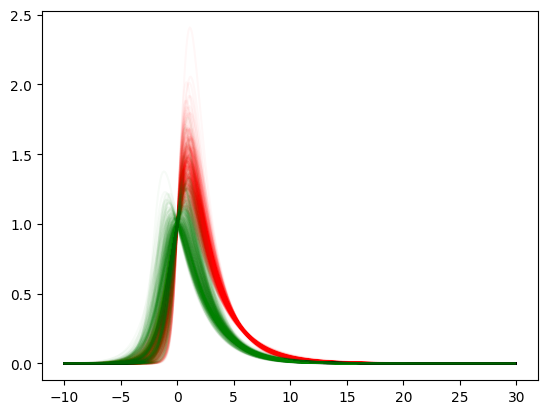

18


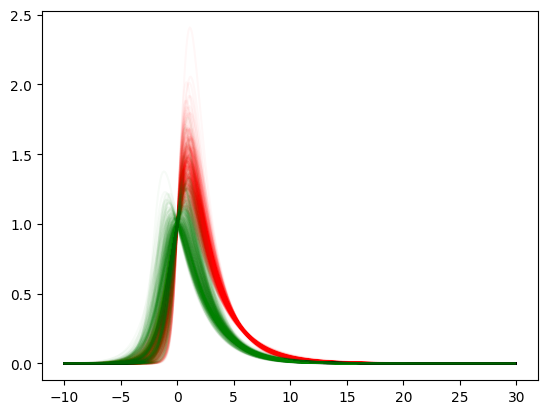

19


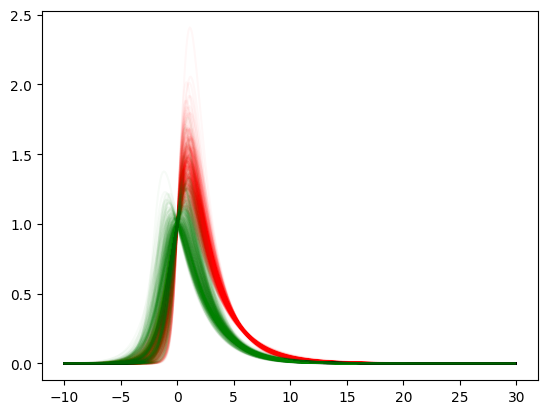

20


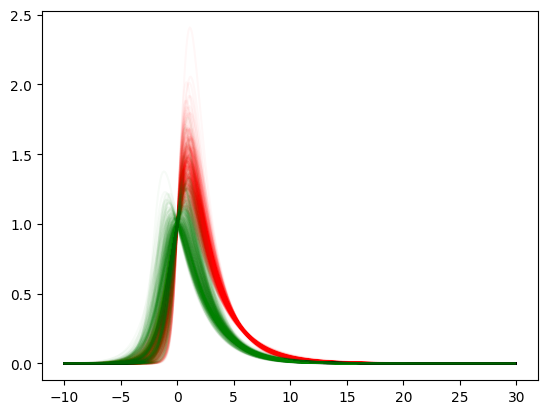

In [17]:
colors = ['r', 'g']
for event_num in range(len(index)):
    print(event_num)
    plt.figure()
    object_df = new_object_df[new_object_df['object_index']==event_num]
    for band in range(2):
        for sample_no in range(100):
            sample_no=sample_no
            for chain_num in range(4):
                t0 = mcmc_samples.t0[sample_no, chain_num, event_num, band]
                t_rise = mcmc_samples.t_rise[sample_no, chain_num, event_num, band]
                t_fall_ = mcmc_samples.t_fall_[sample_no, chain_num, event_num, band]
                t_fall = t_fall_ + t_rise
                amp = mcmc_samples.amp[sample_no, chain_num, event_num, band]

                predictions = parametric_fn(t0, t_rise, t_fall, amp, np.arange(-10,30, .1))
                plt.plot(np.arange(-10,30, .1), predictions, alpha=.03, color=colors[band])


        band_df = object_df[object_df['band_index']==band]
        plt.errorbar(band_df["time"], band_df["flux"], yerr=band_df["fluxerr"], fmt="o", color=colors[band])
    if event_num==20:
        break
    plt.show()